# **Uso de YoloV5 para la detección de objetos**


En nuestro paso por el aprendizaje de redes neuronales aprenderemos como usar YoloV5 para el cometido de la detección de objetos.

YoloV5 viene simplemente a ser un **modelo de red neuronal de código abierto para detección de objetos** (ya preentrenado), el cual hace uso de una red neuronal convolucional.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
%cd /content/drive/My Drive/
!pwd
os.chdir('/content/drive/MyDrive/Colab Notebooks/YoloV5')
!pwd

/content/drive/My Drive
/content/drive/My Drive
/content/drive/MyDrive/Colab Notebooks/YoloV5


## Paquetes y requerimientos importantes

Clonaremos los paquetes y requerimientos importantes para el uso de YoloV5.

In [ ]:
# clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # Dependencias
%pip install -q roboflow # Para poder acceder a Roboflow y las imágenes que usamos

import torch
from IPython.display import Image, clear_output  # Para poder mostrar las imágenes al final

Cloning into 'yolov5'...
remote: Enumerating objects: 14840, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 14840 (delta 127), reused 155 (delta 110), pack-reused 14655
Receiving objects: 100% (14840/14840), 13.82 MiB | 8.17 MiB/s, done.
Resolving deltas: 100% (10217/10217), done.
/content/drive/MyDrive/Colab Notebooks/YoloV5/yolov5
     |████████████████████████████████| 182 kB 7.1 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 1.6 MB 69.9 MB/s 
     |████████████████████████████████| 42 kB 833 kB/s 
     |████████████████████████████████| 67 kB 5.8 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 145 kB 5.6 MB/s 
     |████████████████████████████████| 178 kB 67.1 MB/s 
     |████████████████████████████████| 138 kB 66.6 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 


#  Creación del dataset en Roboflow

En nuestro caso, los objetos que vamos a querer detectar serán **relojes**, ya sean de mano, de pared, digitales, etc.

Para ello, descargaremos múltiples imágenes de los mismos y los subiremos a nuestro workspace en cuestión.

Seguidamente, tendremos que **etiquetar las imágenes** en cuestión. Para ello, deberemos indicar a través de las llamadas *Bounding Boxes* los objetos que son relojes. Una vez hecho, generaremos un dataset de tipo YoloV5, que nos generará ficheros .txt con las coordenadas de las Bounding Boxes.

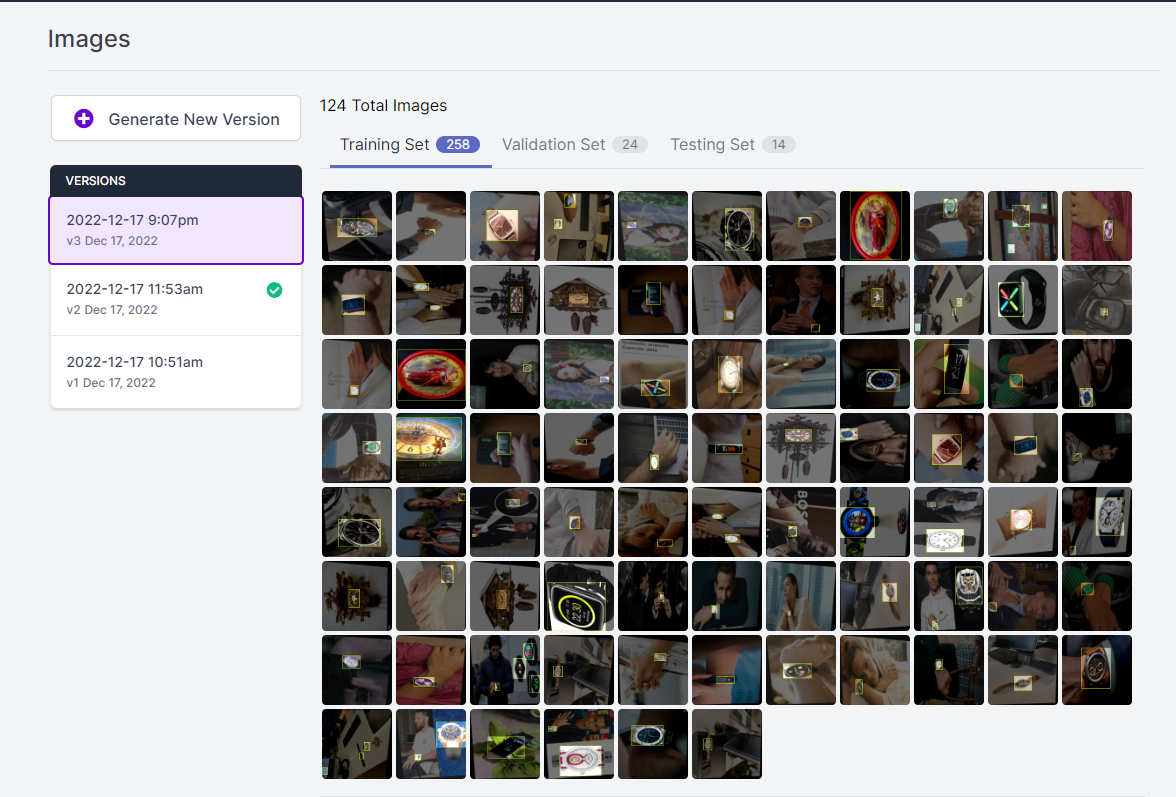


## Acceso al dataset de Roboflow

### *Obtención de la API KEY para nuestro workspace*

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "./relojes"

### *Acceso al dataset y creación del mismo en el repositorio de Drive*

Podemos obtener las siguientes líneas de código al acceder de forma manual a nuestro proyecto en cuestión (en nuestro caso, "Relojes"), a través del link para *obtener la API KEY para nuestro workspace*.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ddGed6i494J9RMBam5vV")
project = rf.workspace().project("relojes")
dataset = project.version(3).download("yolov5")
print(dataset.location)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ./relojes/Relojes-3 in yolov5pytorch:: 100%|██████████| 604/604 [00:03<00:00, 164.51it/s]

/content/drive/MyDrive/Colab Notebooks/YoloV5/yolov5/relojes/Relojes-3


## Entrenamiento del modelo

Argumentos:
- **--img:** Tamaño de las imágenes
- **--batch:** Tamaño del batch de imágenes
- **--epochs:** Nº de épocas para el entrenamiento
- **--data:** Localización del dataset (en Google Drive) --> dataset.location
- **--weights:** Localización de los pesos del modelo (ya preentrenados)
- **--cache:** Opción caché para entrenar más rápido

In [ ]:
!python train.py --img 512 --batch 16 --epochs 40 --data "/content/drive/MyDrive/Colab Notebooks/YoloV5/yolov5/relojes/Relojes-3/data.yaml" --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/Colab Notebooks/YoloV5/yolov5/relojes/Relojes-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=16, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/content/drive/MyDrive/Colab': No such file or directory
YOLOv5 🚀 2022-12-21 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, war

## Puesta a prueba del nuevo modelo entrenado con el conjunto de test

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 512 --conf 0.1 --source '/content/drive/MyDrive/Colab Notebooks/YoloV5/yolov5/relojes/Relojes-3/test/images'

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Colab Notebooks/YoloV5/yolov5/relojes/Relojes-3/test/images, data=data/coco128.yaml, imgsz=[512, 512], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/drive/MyDrive/Colab': No such file or directory
YOLOv5 🚀 2022-12-21 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/14 /content/drive/MyDrive/Colab Notebooks/YoloV5/yolov5/relojes/Relojes-3/test/images/0fa0fe47-cd80-4fdd-8ef0-86f2cb5629e5_jpeg.rf.2f7c59716f86ebdc6daacf9b2dd16098.jpg: 512x512 2 Relojess, 8.9ms
image 

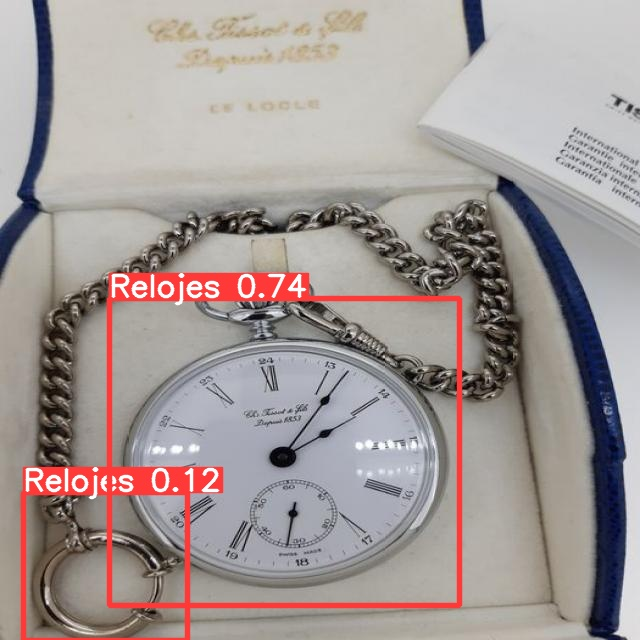

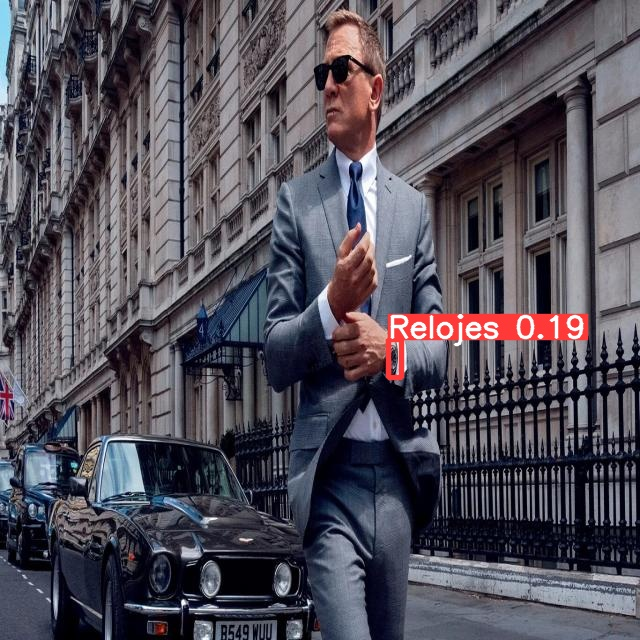

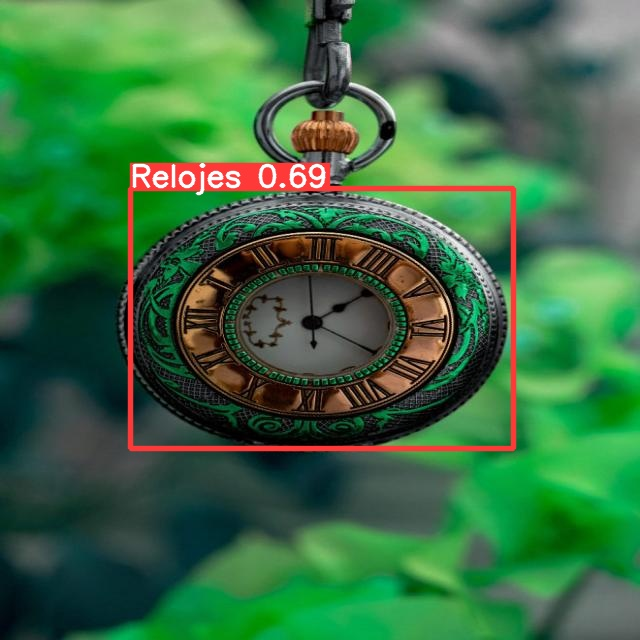

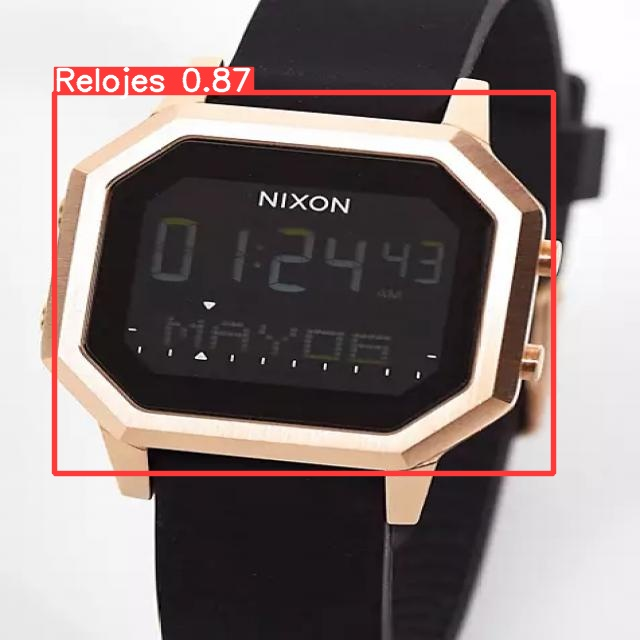

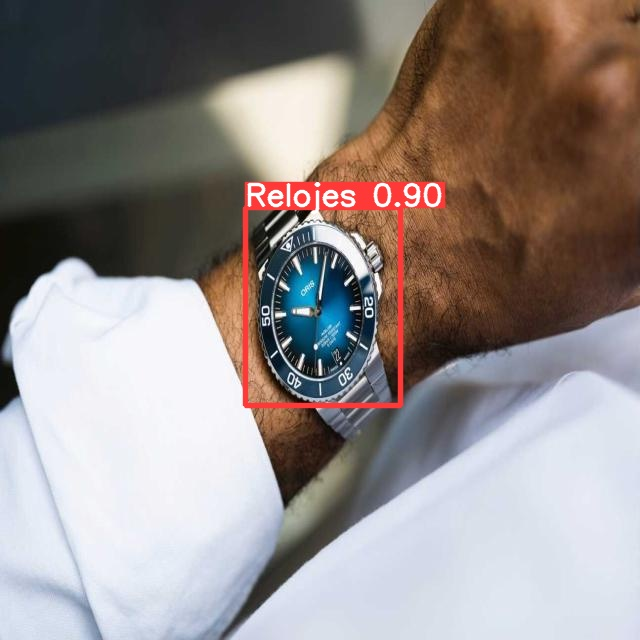

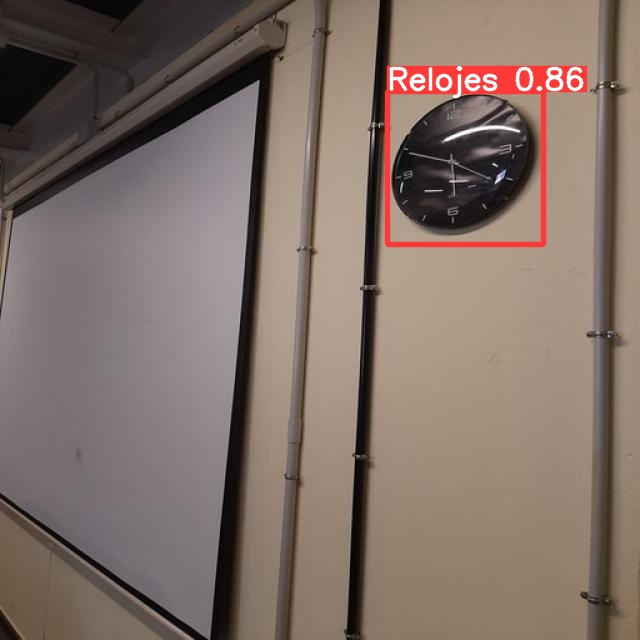

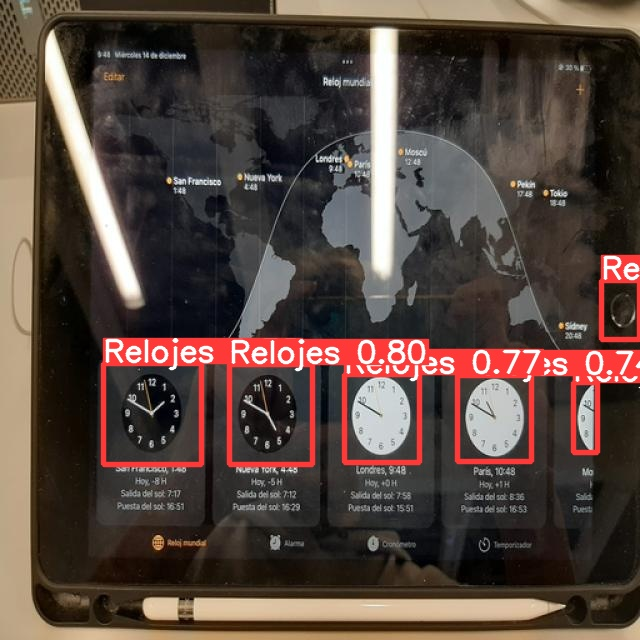

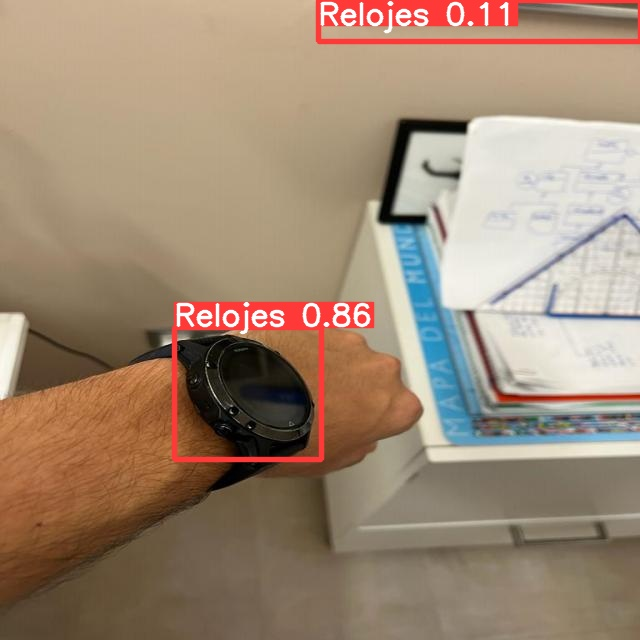

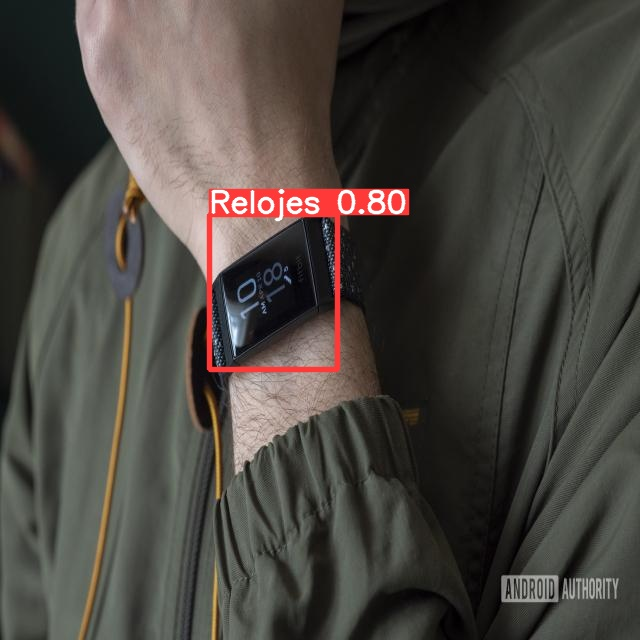

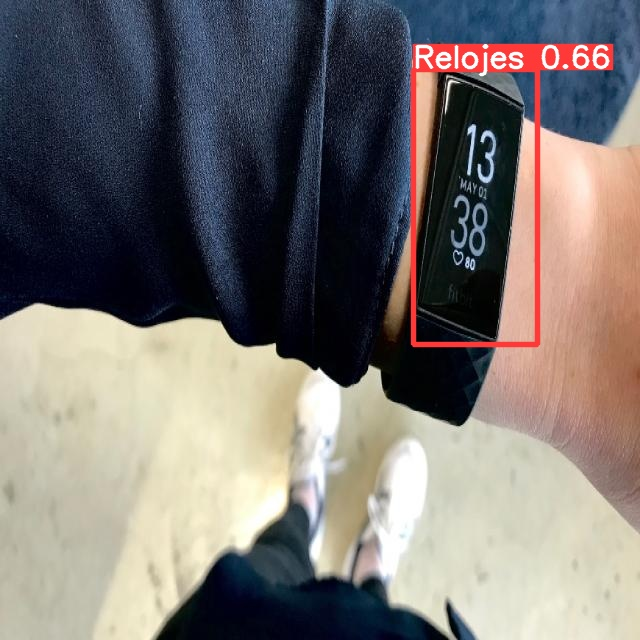

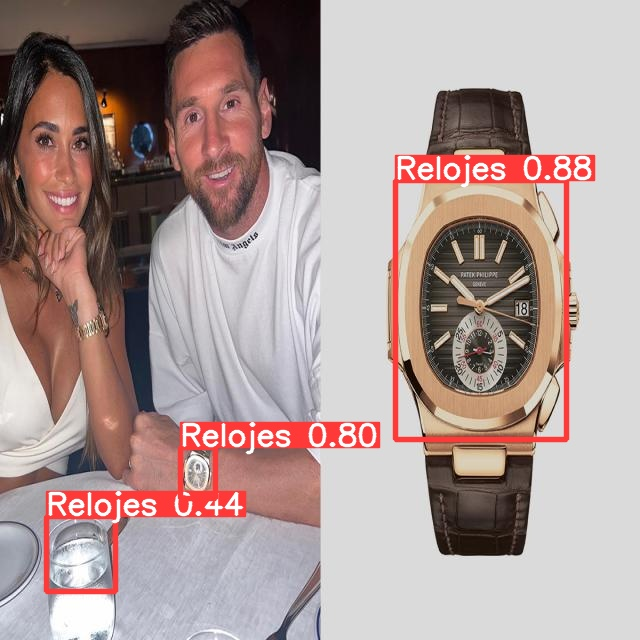

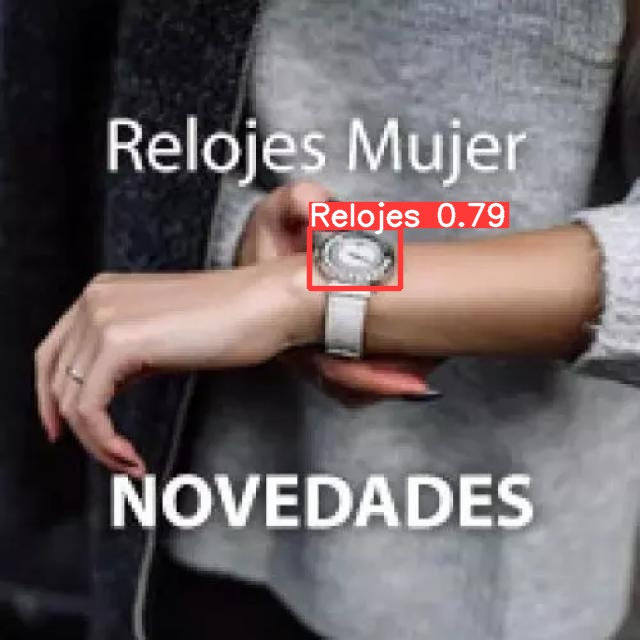

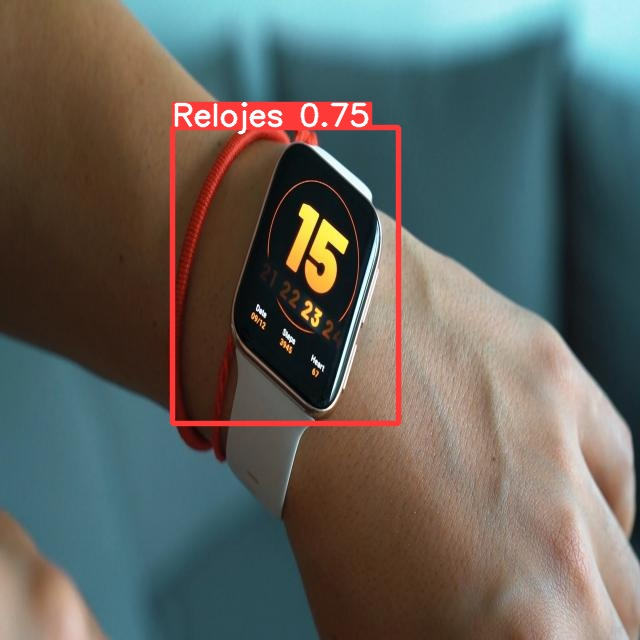

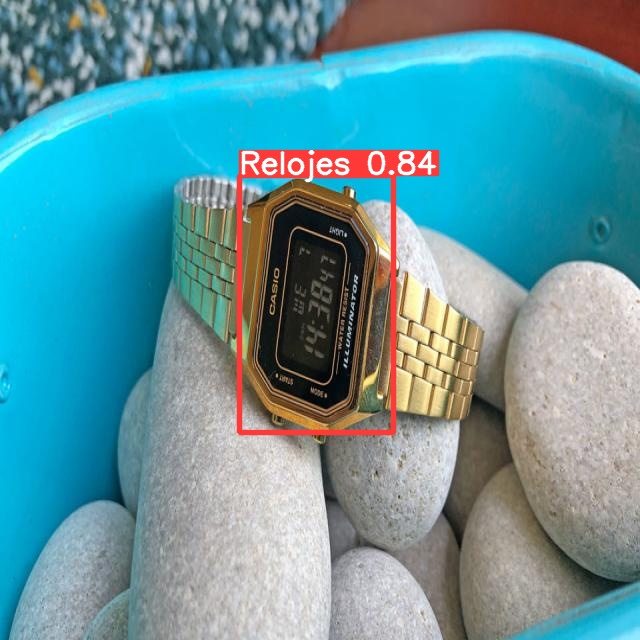

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/Colab Notebooks/YoloV5/yolov5/runs/detect/exp/*.jpg'): # linea a cambiar según el experimento (exp1, exp2, exp3, ...)
    display(Image(filename=imageName))
    print("\n")

## Exportación del nuevo modelo para posteriores usos

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/YoloV5/yolov5/runs/train/exp/weights/best.pt') # linea  a cambiar según el experimento

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>